In [1]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = 'C:/Users/jamiy/Documents/Análisis/PLFA Analysis/rpca.csv'
data = pd.read_csv(file_path, encoding='latin1')

In [2]:
# Observacion de los primeros datos del DataFrame
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tratamiento  27 non-null     object 
 1   Gram -       27 non-null     float64
 2   Gram +       27 non-null     float64
 3   HMA          27 non-null     float64
 4   Hongos       27 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


(None,
   Tratamiento   Gram -     Gram +       HMA     Hongos
 0     Control  3.918640  0.613882  6.623842  14.752867
 1     Control  3.260513  0.000000  3.526785   7.465129
 2     Control  5.593390  1.123155  1.934136   8.619532
 3     Control  3.152234  0.106967  1.505130   5.322210
 4     Control  4.188430  0.521188  0.793190   3.437246)

In [3]:
# Importar librerias

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Ejecutar ANOVA para cada variable del analisis PLFA
anova_results = {}
for column in data.columns[1:]:
    anova_results[column] = stats.f_oneway(
        *(data[data['Tratamiento'] == treatment][column] for treatment in data['Tratamiento'].unique())
    )

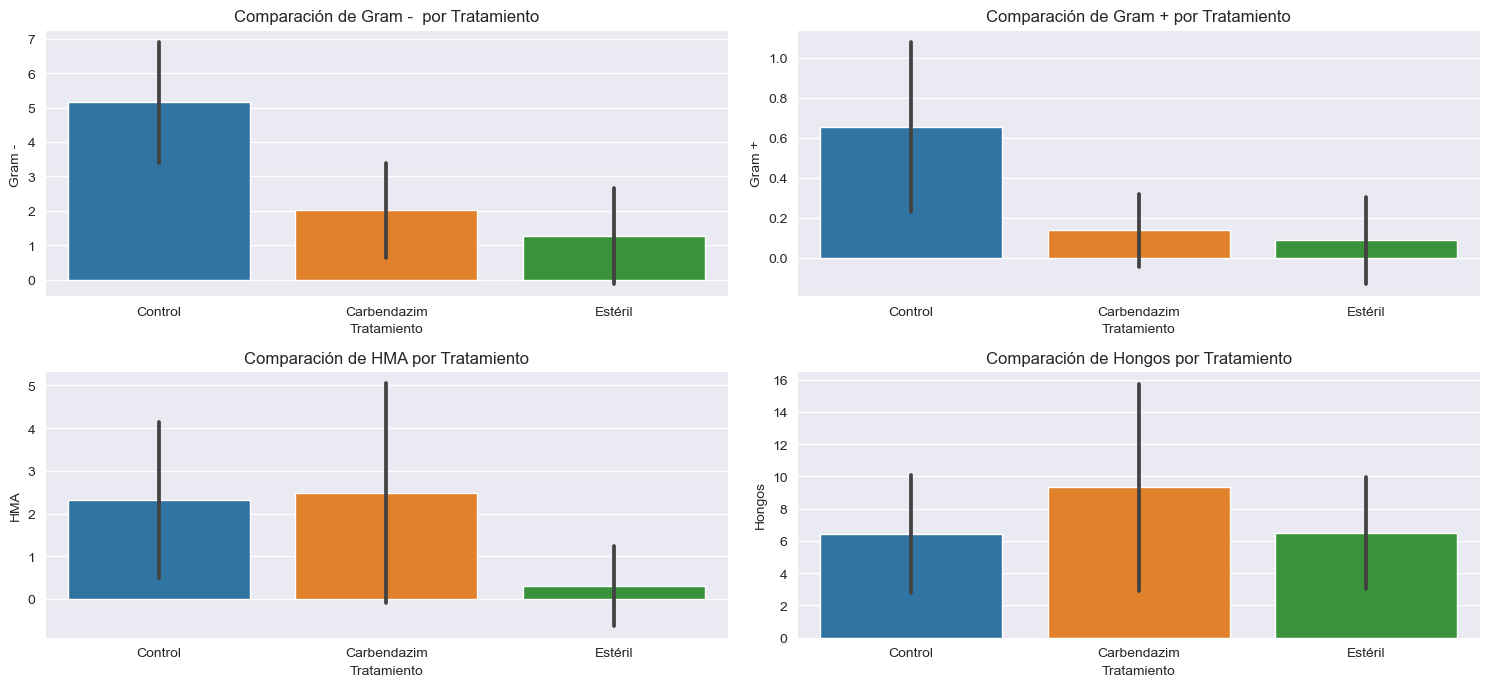

{'Gram - ': F_onewayResult(statistic=16.5324859659799, pvalue=3.062665770076927e-05),
 'Gram +': F_onewayResult(statistic=10.172180440652966, pvalue=0.0006316465102632378),
 'HMA': F_onewayResult(statistic=3.637224071020613, pvalue=0.0417118104469094),
 'Hongos': F_onewayResult(statistic=1.115121324677517, pvalue=0.3442763600658526)}

In [5]:
# Graficar Barplots para los test ANOVA
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Tratamiento', y=column, data=data, errorbar='sd')
    plt.title(f'Comparación de {column} por Tratamiento')
    plt.ylabel(column)
    plt.xlabel('Tratamiento')

plt.tight_layout()
plt.show()
anova_results

In [6]:
# Librerias para correr PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
# Estandarizacion de datos

features = data.columns[1:]
x = data[features].values
x = StandardScaler().fit_transform(x)

In [8]:
# Ejecutar PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

In [9]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, data[['Tratamiento']]], axis=1)

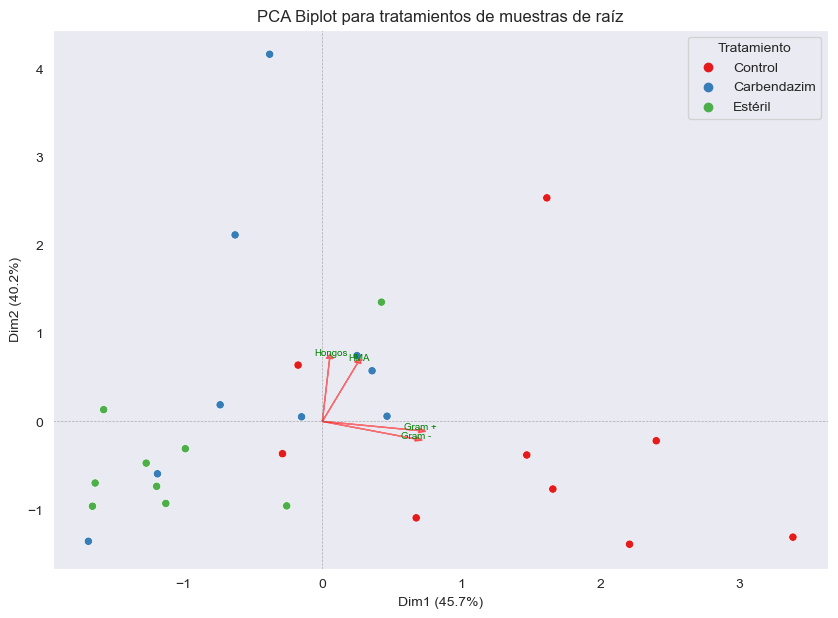

In [10]:
# Plotting the biplot
plt.figure(figsize=(10, 7))

# Scatter plot of the principal components
sns.scatterplot(x='PC1', y='PC2', hue='Tratamiento', data=pca_df, palette='Set1')

# Plot the vectors of the original features
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='r', alpha=0.5, head_width=0.05, head_length=0.05)


    # Apply a small offset to the label to prevent overlap
    offset = np.sign(pca.components_[:, i]) * 0.01
    plt.text(pca.components_[0, i] + offset[0], pca.components_[1, i] + offset[1], feature,
             color='g', ha='center', va='bottom', fontsize=7)

plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Biplot')
plt.title('PCA Biplot para tratamientos de muestras de raíz')

# Activa cuadricula
plt.grid(False)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

In [11]:
print(pca_df)

         PC1       PC2  Tratamiento
0   1.614654  2.532803      Control
1  -0.174600  0.637986      Control
2   2.401715 -0.219612      Control
3  -0.286778 -0.366074      Control
4   0.674966 -1.093259      Control
5   1.657908 -0.766733      Control
6   1.470334 -0.380770      Control
7   2.209568 -1.391998      Control
8   3.384867 -1.311767      Control
9  -1.683020 -1.358475  Carbendazim
10 -0.735112  0.188082  Carbendazim
11  0.357705  0.573594  Carbendazim
12 -0.379104  4.160672  Carbendazim
13 -1.186249 -0.593898  Carbendazim
14 -0.627624  2.113292  Carbendazim
15  0.249176  0.745421  Carbendazim
16  0.465099  0.058770  Carbendazim
17 -0.149721  0.051958  Carbendazim
18 -1.267130 -0.472773      Estéril
19  0.424963  1.351494      Estéril
20 -1.573154  0.133088      Estéril
21 -0.256550 -0.957321      Estéril
22 -1.634392 -0.698297      Estéril
23 -0.985642 -0.309323      Estéril
24 -1.653768 -0.961345      Estéril
25 -1.192035 -0.736027      Estéril
26 -1.126074 -0.929488      

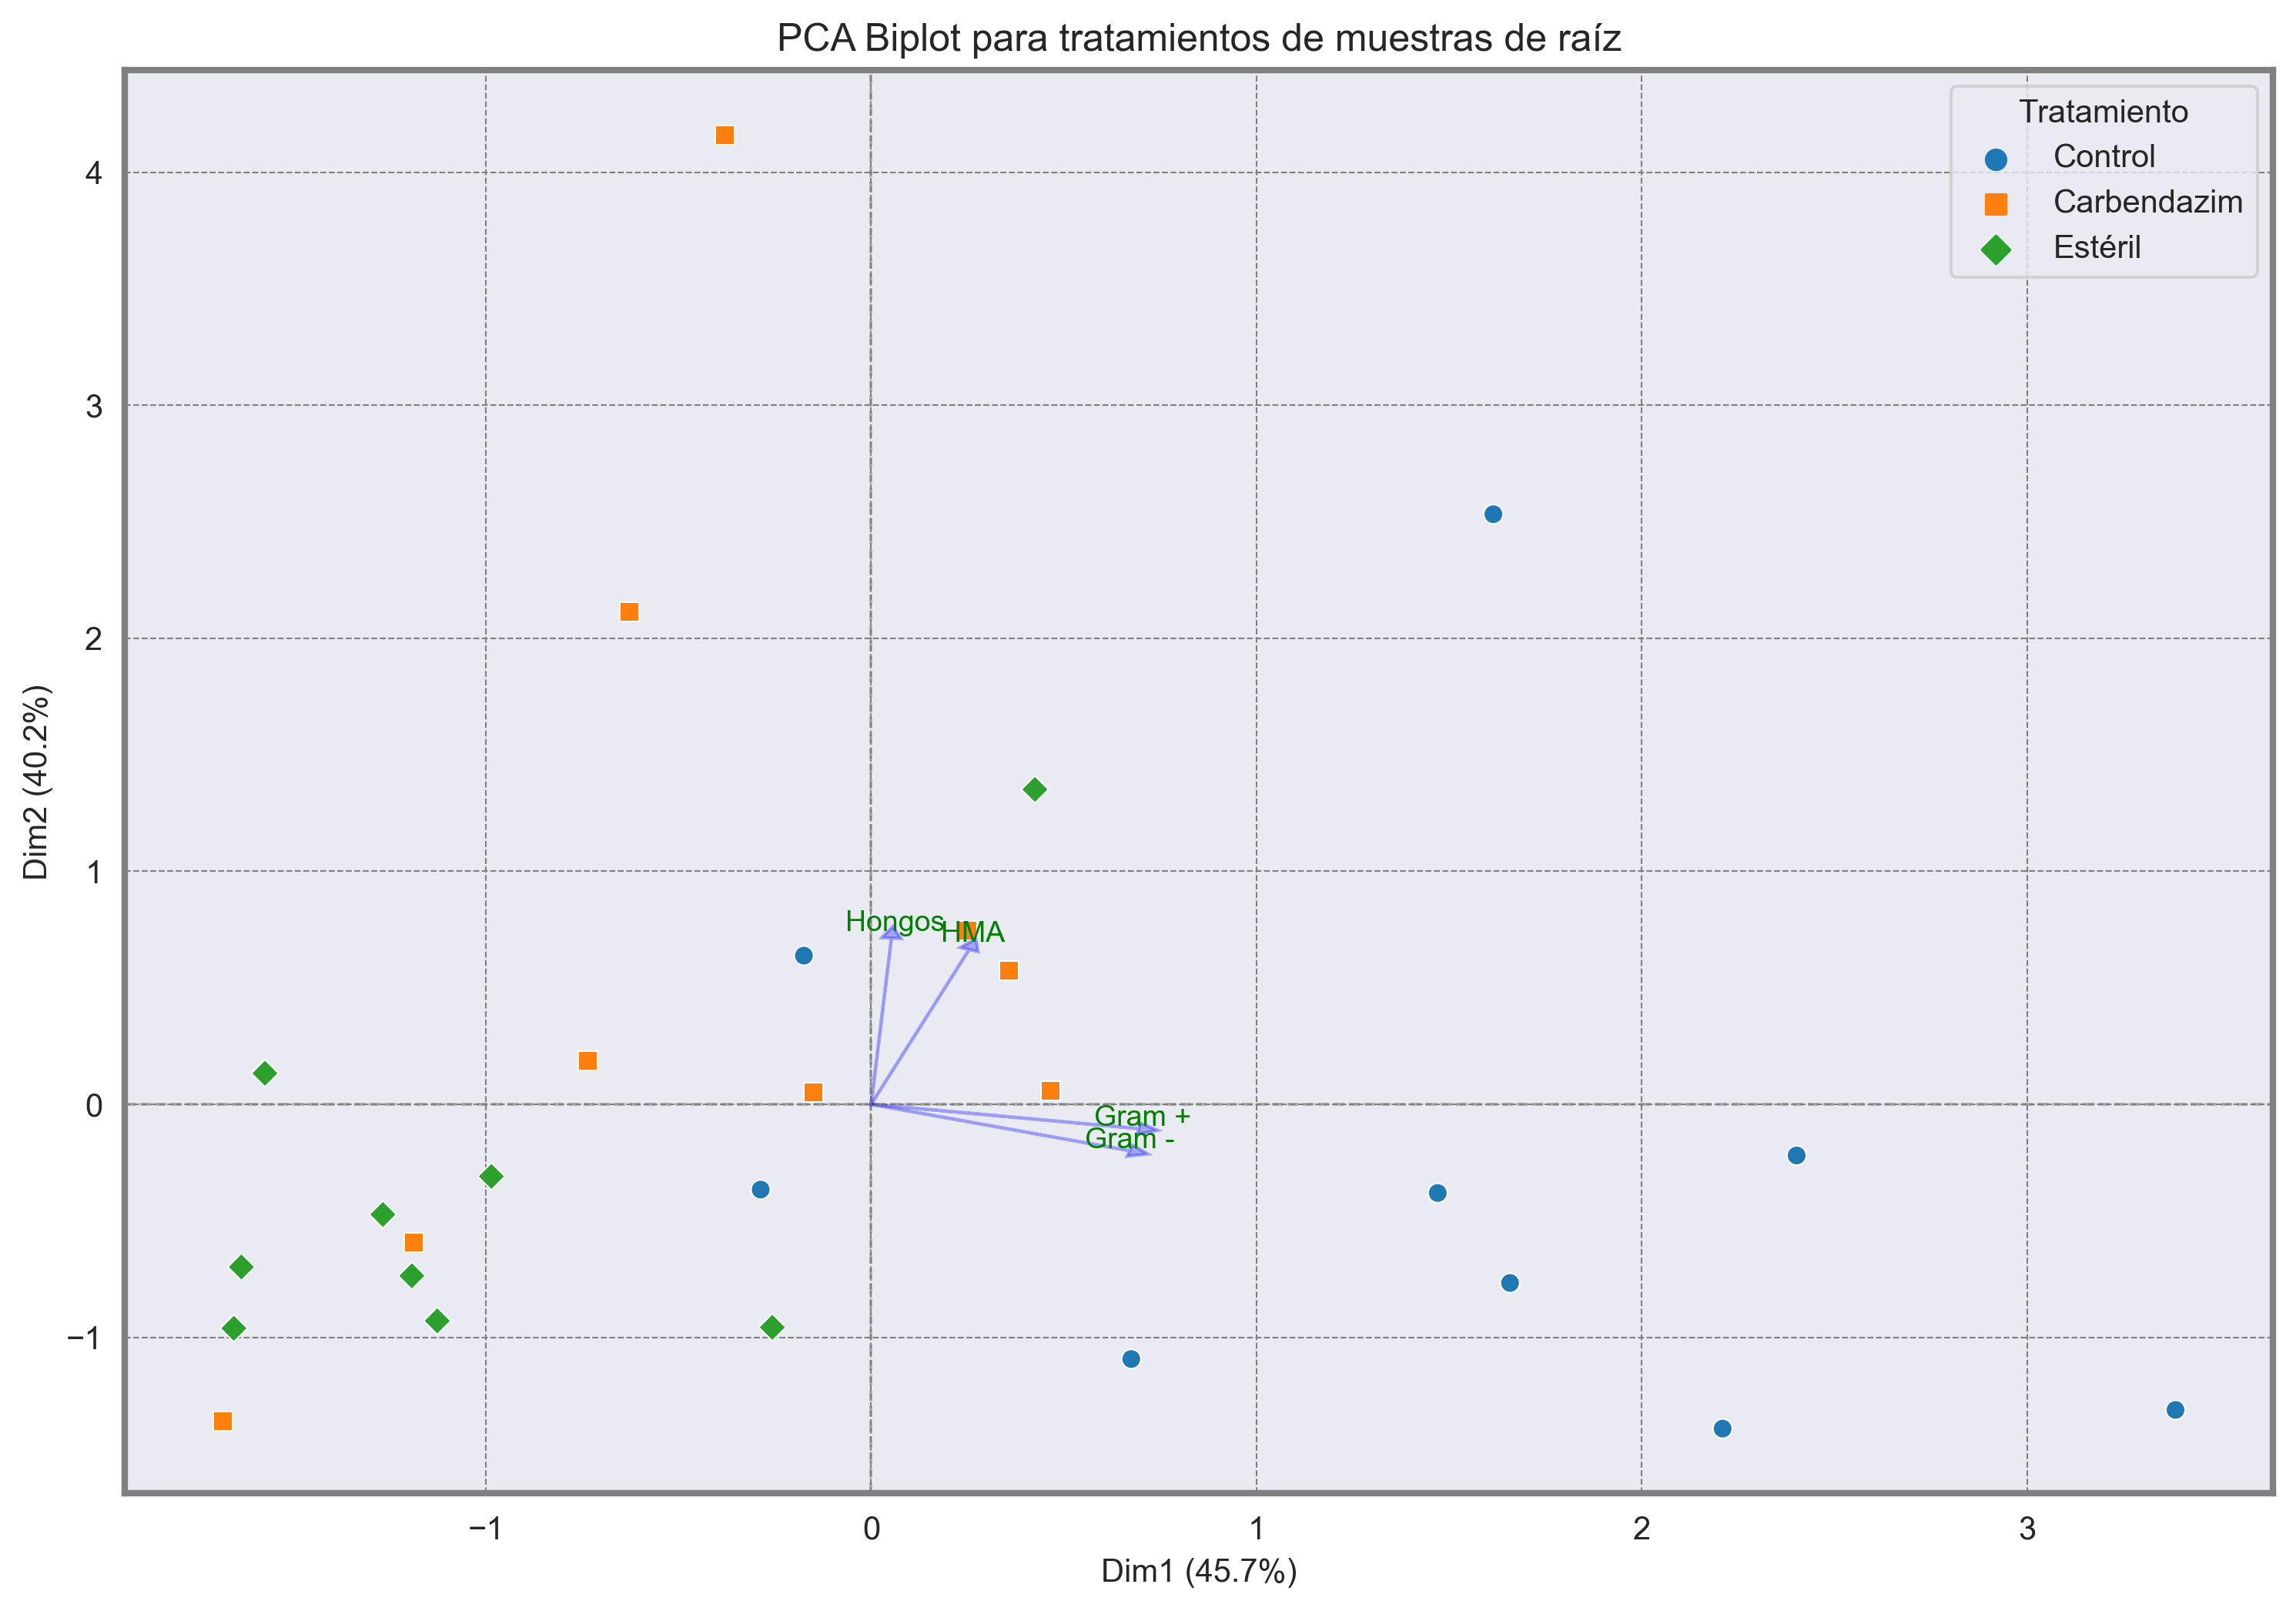

In [23]:
plt.figure(figsize=(12, 8), dpi=300)

# Definir el mapa de estilos
markers = {'Control': 'o', 'Carbendazim': 's', 'Estéril': 'D'}

# Crear el biplot con diferentes estilos de puntos y tamaños según 'Valor'
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Tratamiento', style='Tratamiento', markers=markers)

# Plot the vectors of the original features
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='b', alpha=0.3, head_width=0.05, head_length=0.05)

    # Apply a small offset to the label to prevent overlap
    offset = np.sign(pca.components_[:, i]) * 0.01
    plt.text(pca.components_[0, i] + offset[0], pca.components_[1, i] + offset[1], feature,
             color='g', ha='center', va='bottom', fontsize=9)

plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Biplot para tratamientos de muestras de raíz')

# Activa cuadricula
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Para visualizar marco
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.spines['top'].set_linewidth(2)  # Grosor del marco superior
ax.spines['top'].set_color('gray')  # Color del marco superior
ax.spines['right'].set_linewidth(2)  # Grosor del marco derecho
ax.spines['right'].set_color('gray')  # Color del marco derecho
ax.spines['left'].set_linewidth(2)  # Grosor del marco izquierdo
ax.spines['left'].set_color('gray')  # Color del marco izquierdo
ax.spines['bottom'].set_linewidth(2)  # Grosor del marco inferior
ax.spines['bottom'].set_color('gray')  # Color del marco inferior

plt.axhline(0, linestyle='--', linewidth=0.9, alpha=0.6, color='gray')
plt.axvline(0, linestyle='--', linewidth=0.9, alpha=0.6, color='gray')
plt.savefig('PCA Root Samples 24.png', transparent = True, dpi = 450);

# Mostrar el gráfico
plt.show()

